# <font color = Crimson size = 6> <b>Гипотеза о законе распределения генеральной совокупности</b> </font>

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Рассмотрим **генеральную совокупность**, распределение которой неизвестно. Однако есть основание полагать, что она распределена по некоторому закону $Z$ (чаще всего, нормально). Это предположение может появиться как до, так и в результате статистического исследования, когда мы извлекли и изучили выборку объёма $n$.

И нам требуется на уровне значимости $\alpha$ проверить нулевую гипотезу $H_0$ – о том, что генеральная совокупность распределена по закону $Z$ против конкурирующей гипотезы $H_1$ о том, что она по нему НЕ распределена.
<br><br>

Выборочные данные группируются в дискретный или интервальный вариационный ряд с вариантами $x_i$ и соответствующими частотами $n_i$.
<img src="./img/st_07_image1.png" width=""/>

Поскольку эти данные взяты из практического опыта, то выборочный вариационный ряд называют <u>**эмпирическим рядом**</u>, а частоты $n_i$ – <u>**эмпирическими частотами**</u>.
<br><br>


Далее строятся графики, рассчитываются выборочные характеристики: выборочная средняя $\bar{x_e}$, выборочная дисперсия $\sigma_e^2$ и другие.
<br><br>


На основе некоторых выборочных характеристик по специальным формулам, которые зависят от проверяемого закона $Z$, строится **теоретическое распределение**, где для тех же вариант $x_1,x_2,\ldots,x_m$ рассчитываются **теоретические частоты** $n'_1,n'_2,\ldots,n'_m$. Теоретические частоты моделируют закон $Z$ и наилучшим образом приближают эмпирические данные, при этом их сумма $\sum{n'_i}$ чуть меньше либо равна сумме эмпирических частот $\sum{n_i}=n$.

>*Чуть меньше* бывает в тех случаях, когда теоретическое распределение бесконечно (а эмпирическое всегда конечно).\
Данным расхождением между суммами, как правило, пренебрегают

<br>

**Значимо** или **незначимо** различие между эмпирическими $n_1,n_2,\ldots,n_m$ и соответствующими теоретическими $n'_1,n'_2,\ldots,n'_m$ частотами? \
Для ответа на это вопрос рассматривают различные статистические критерии, которые называют **критериями согласия**, и наиболее популярный из них разработал Карл Пирсон.

***
## <font color = DarkGreen size = 5> <b>Критерий согласия Пирсона</b> </font>

$\displaystyle \chi^2 = \sum{\frac{(n_i-n'_i)^2}{n'_i}}$

При достаточно большом объёме выборки $n$ распределение этой случайной величины близкО к распределению хи-квадрат с количеством степеней свободы $k=m-r-1$, где $r$ – количество оцениваемых параметров закона $Z$.
<br><br>


Далее строится правосторонняя критическая область:
<img src="./img/st_07_image2.png" width=""/>

Критическое значение: $\chi_к^2 = \chi^2(\alpha,k)$

Наблюдаемое значение критерия рассчитывается по эмпирическим и найденным теоретическим частотам:\
$\displaystyle \chi_н^2 = \sum_{i=1}^{m}{\frac{(n_i-n'_i)^2}{n'_i}}$

Если $\chi_н^2 < \chi_к^2$, то на уровне значимости $\alpha$ нет оснований отвергать гипотезу $H_0$ о том, что генеральная совокупность распределена по закону $Z$. То есть, различие между эмпирическими и теоретическими частотами незначимо и обусловлено случайными факторами (случайностью самой выборки, способом группировки данных и т.д.)

Если $\chi_н^2 < \chi_к^2$, то нулевую гипотезу отвергаем, иными словами эмпирические и теоретические частоты отличаются значимо, и это различие вряд ли случайно.

##### <font color = SlateBlue size = 3> Пример </font>

По результатам выборочного исследования найдено распределение средних удоев молока в фермерском хозяйстве (литров) от одной коровы за день:

| Литры | 7.5-10.5 | 10.5-13.5 | 13.5-16.5 | 16.5-19.5 | 19.5-22.5 | 22.5-25.5 | 25.5-28.5 | 28.5-31.5 | 31.5-34.5 |
|:-----|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| Коров | 2 | 6 | 10 | 17 | 33 | 11 | 9 | 7 | 5 |

На уровне значимости $0,05$ проверить гипотезу о том, что генеральная совокупность (средний удой коров всей фермы) распределена нормально. Построить эмпирическую гистограмму и теоретическую кривую.

На уровне значимости $\alpha$ проверим гипотезу $H_0$ о нормальном распределении генеральной совокупности против конкурирующей гипотезы $H_1$ о том, что она так НЕ распределена.\
Используем критерий согласия Пирсона: $\displaystyle \chi^2 = \sum{\frac{(n_i-n'_i)^2}{n'_i}}$

Эмпирические частоты известны из предложенного интервального ряда, и осталось найти теоретические. Для этого нужно вычислить выборочную среднюю $\bar{x_e}$ и выборочное стандартное отклонение $\sigma_e$.\
Выберем в качестве вариант $x_i$ середины частичных интервалов (длина каждого интервала $h=3$).

In [2]:
df = pd.DataFrame({'intL': [7.5, 10.5, 13.5, 16.5, 19.5, 22.5, 25.5, 28.5, 31.5],
                   'intR': [10.5, 13.5, 16.5, 19.5, 22.5, 25.5, 28.5, 31.5, 34.5],
                   'ni': [2, 6, 10, 17, 33, 11, 9, 7, 5]})

h = 3
df['xi'] = df['intL'] + h/2
df['xini'] = df['xi'] * df['ni']
df['xi2ni'] = df['xi']**2 * df['ni']
df

,intL,intR,ni,xi,xini,xi2ni
0,7.5,10.5,2,9.0,18.0,162.0
1,10.5,13.5,6,12.0,72.0,864.0
2,13.5,16.5,10,15.0,150.0,2250.0
3,16.5,19.5,17,18.0,306.0,5508.0
4,19.5,22.5,33,21.0,693.0,14553.0
5,22.5,25.5,11,24.0,264.0,6336.0
6,25.5,28.5,9,27.0,243.0,6561.0
7,28.5,31.5,7,30.0,210.0,6300.0
8,31.5,34.5,5,33.0,165.0,5445.0


In [3]:
X = []
for i, row in df.iterrows():
    n = 0
    while n < row['ni']:
        X.append(row['xi'])
        n += 1

n = sum(df['ni'])
xe = sum(df['xini']) / n
xe

21.21

In [4]:
# смещенная дисперсия
#De = sum(df['xi2ni']) / n - xe**2
#De = np.var(X)
#print(f'{De = }')

# смещенное стандартное отклонение
#sd = np.sqrt(De)
sd = np.std(X)
sd

5.470457019299211

Теоретические частоты рассчитываются по формуле: \
$n'_i = \cfrac{h \cdot n}{\sigma_e} \cdot f(z_i)$, где 
$f(z)=\cfrac{1}{\sqrt{2\pi}} \cdot e^{-\frac{z^2}{2}}$ – функция Гаусса, 
$z_i = \cfrac{x_i-\bar{x_e}}{\sigma_e}$



In [5]:
df['zi'] = round((df['xi'] - xe) / sd,4)
df['fzi'] = stats.norm.pdf(df['zi'])
df["n'i"] = round(h * n * df['fzi'] / sd,2)
print(sum(df["n'i"]))

df

98.75


,intL,intR,ni,xi,xini,xi2ni,zi,fzi,n'i
0,7.5,10.5,2,9.0,18.0,162.0,-2.2320,0.033046,1.81
1,10.5,13.5,6,12.0,72.0,864.0,-1.6836,0.096695,5.30
2,13.5,16.5,10,15.0,150.0,2250.0,-1.1352,0.209448,11.49
3,16.5,19.5,17,18.0,306.0,5508.0,-0.5868,0.335845,18.42
4,19.5,22.5,33,21.0,693.0,14553.0,-0.0384,0.398648,21.86
5,22.5,25.5,11,24.0,264.0,6336.0,0.5100,0.350292,19.21
6,25.5,28.5,9,27.0,243.0,6561.0,1.0584,0.227855,12.50
7,28.5,31.5,7,30.0,210.0,6300.0,1.6068,0.109718,6.02
8,31.5,34.5,5,33.0,165.0,5445.0,2.1552,0.039110,2.14


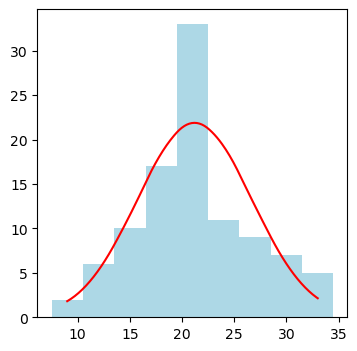

In [6]:
from scipy.interpolate import make_interp_spline

# Создаем оси
x_points = df['xi']
y_points = df['ni']

# Создаем plot
fig, ax = plt.subplots(figsize=(4, 4))

# Наводим красоту
ax.bar(x_points, y_points, width=3, color = 'lightblue')

# Сгладить график
Xline = np.linspace(df['xi'].min(), df['xi'].max(), 200)
spl = make_interp_spline(df['xi'], df["n'i"], k=2)
Ysmooth = spl(Xline)

plt.plot(Xline, Ysmooth, color='red')
plt.show()

Высота «ступенек» равна частотам $n_i$. Нормальная кривая построена на основе выборочных данных (выборочной средней и стандартного отклонения), она проходит через точки $(x_i,n'_i)$ и наилучшим образом приближает гистограмму. При этом сумма теоретических частот $\sum{n'_i} \approx 98.75$ оказалась чуть меньше объёма выборки $\sum{n_i}=100$. Это объяснимо тем, что эмпирическая гистограмма конечна, а нормальная кривая – бесконечна, и небольшой «недобор» теоретических частот приходится на участки, лежащие слева и справа от гистограммы.

Дальнейшая задача состоит в том, чтобы оценить, насколько ЗНАЧИМО отличаются эмпирические частоты от соответствующих теоретических частот.

Но перед тем, как сравнивать теоретические и эмпирические частоты, следует объединить интервалы с малыми (меньше пяти) частотами. В данном случае объединяем два первых и два последних интервала.

> Это нужно для того, чтобы сгладить неоправданно большое расхождением между малыми частотами по краям выборки. Действие не обязательное, но крайне желательное.

Вычислим наблюдаемое значение критерия $\displaystyle \chi_н^2 = \sum_{i=1}^{m}{\frac{(n_i-n'_i)^2}{n'_i}}$ (сумма расхождений между частотами)

In [7]:
s1 = df[["ni","n'i"]].loc[0:1].sum()
s2 = df[["ni","n'i"]].loc[7:8].sum()
df_group = pd.concat([s1.to_frame().T, df[["ni","n'i"]].loc[2:6], s2.to_frame().T], ignore_index=True)

df_group["chi"] = round((df_group["ni"]-df_group["n'i"])**2/df_group["n'i"],4)
print(f'Chi = {sum(df_group["chi"])}')

df_group

Chi = 12.387


,ni,n'i,chi
0,8.0,7.11,0.1114
1,10.0,11.49,0.1932
2,17.0,18.42,0.1095
3,33.0,21.86,5.6770
4,11.0,19.21,3.5088
5,9.0,12.50,0.9800
6,12.0,8.16,1.8071


Найдём критическое значение $\chi_к^2 = \chi^2(\alpha,k)$ критерия согласия Пирсона. \
Количество степеней свободы определяется по формуле $k=m-r-1$, где $m$ – количество интервалов, а $r$ – количество оцениваемых параметров рассматриваемого закона распределения. \
Так как мы объединяли интервалы, то теперь $m=7$. У нормального закона мы оцениваем $r=2$ параметра.

> Два оцениваемых параметра: \
$\bar{x_e}$ – это оценка неизвестного генерального матоожидания, \
$\sigma_e$ – это оценка неизвестного генерального стандартного отклонения.

In [8]:
alpha = 0.05
k = len(df_group.index) - 2 - 1

chi = stats.chi2.isf(alpha, k)
print(f'{chi = }')

chi = 9.487729036781158


Т.к. $\chi_н^2 \approx 12.387 > \chi_к^2$, поэтому **на уровне значимости $0,05$ гипотезу $H_0$ о нормальном распределении генеральной совокупности отвергаем**.

Иными словами **различие между эмпирическими и теоретическими частотами статистически значимо и вряд ли объяснимо случайными факторами**. При этом с вероятностью 5% мы совершили **ошибку 1-го рода** (то есть, ген. совокупность на самом деле распределена нормально, но мы это отвергли).

***
## <font color = DarkGreen size = 5> <b>Предполагаемый закон распределения</b> </font>

***
### <font color = MediumBlue size = 4> <b>Графический способ</b> </font>

Для интревального вариационного ряда строится **гистограмма частот**:
* Если построенная гистограмма по форме напоминает колоколообразный график плотности нормального распределения, то это является веской причиной предположить, что генеральная совокупность распределена нормально.

* Если столбики примерно одинаковы по высоте, то предполагаем, что генеральная совокупность распределена равномерно.

* Для показательного распределения будет своя, характерная гистограмма.

Для дискретных распределений строится **полигон частот**.

#### <font color = SteelBlue size = 3> <b>QQ-plot</b> </font>

[Проверка распределения на нормальность](https://github.com/TanXmas/ProbabilityTheory_and_Statistics/blob/main/St_03_Normal%20distribution.ipynb)

***
### <font color = MediumBlue size = 4> <b>Аналитические признаки (для нормального распределения)</b> </font>

1) У нормального распределения математическое ожидание совпадает с модой и медианой.

2) Выполнение правила «трёх» сигм. Практически все значения нормальной случайной величины находятся в интервале $(a-3\sigma,a+3\sigma)$

3) Коэффициенты асимметрии и эксцесса нормального распределения равны нулю.

> На практике в исследование желательно включить все пункты за исключением, возможно, третьего (т.к. асимметрию и эксцесс рассчитывают далеко не всегда).

Следует отметить, что перечисленные выше предпосылки ещё не означают, что соответствующая гипотеза будет принята. А если гипотеза и окажется принятой, то это всё равно на 100% не гарантирует нормальность генеральной совокупности (так как существует $\beta$-вероятность совершить ошибку 2-го рода – принять неверную гипотезу).

***
### <font color = MediumBlue size = 4> <b>Python</b> </font>



In [9]:
size = 10_000
X = stats.norm.rvs(size=size)
Y = stats.uniform.rvs(size=size)
Z = stats.expon.rvs(size=size)

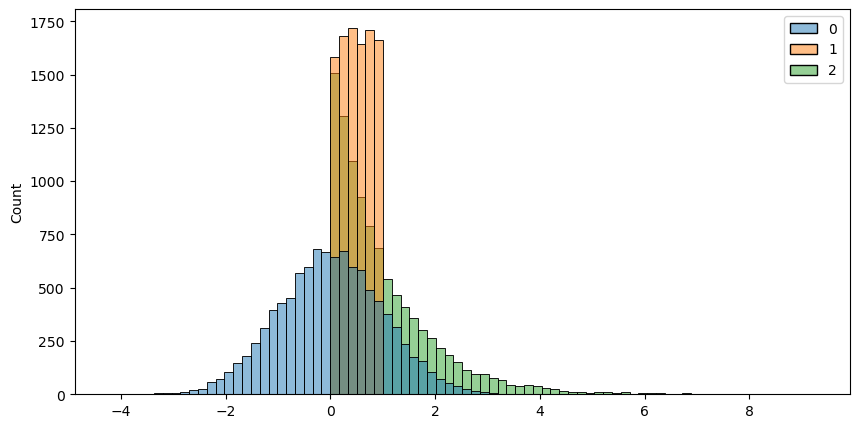

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot([X,Y,Z], bins=80);

In [11]:
distr_name = list(zip((X, Y, Z), ('normal_distr', 'uniform_distr', 'expon_distr')))
distr_name

[(array([-1.8278441 ,  1.79901511,  0.34365676, ..., -2.14793595,
          0.17397905,  0.67331305]),
  'normal_distr'),
 (array([0.77414721, 0.39512504, 0.29523816, ..., 0.98557281, 0.41187241,
         0.95906819]),
  'uniform_distr'),
 (array([0.37797946, 0.98506955, 1.26729415, ..., 0.30209387, 0.4548925 ,
         0.09571759]),
  'expon_distr')]

#### <font color = SteelBlue size = 3> <b>Тест Шапиро-Уилко</b> </font>

Проверка на нормальность.

In [12]:
for distr, name in distr_name:
    print(stats.shapiro(distr), name)

ShapiroResult(statistic=0.999851644039154, pvalue=0.7912874817848206) normal_distr
ShapiroResult(statistic=0.9553354978561401, pvalue=0.0) uniform_distr
ShapiroResult(statistic=0.8128553032875061, pvalue=0.0) expon_distr


#### <font color = SteelBlue size = 3> <b>Тест Колмогорова-Смирнова</b> </font>

Проверка на принадлежность к рапределению.

In [13]:
for distr, name in distr_name:
    print(stats.kstest(distr, 'norm'), name)

KstestResult(statistic=0.004838483978800157, pvalue=0.9724686141736303) normal_distr
KstestResult(statistic=0.5000224983889319, pvalue=0.0) uniform_distr
KstestResult(statistic=0.5000507950901075, pvalue=0.0) expon_distr


In [14]:
for distr, name in distr_name:
    print(stats.kstest(distr, 'uniform'), name)

KstestResult(statistic=0.5001, pvalue=0.0) normal_distr
KstestResult(statistic=0.008608761925004982, pvalue=0.4464739065502137) uniform_distr
KstestResult(statistic=0.37089636980261564, pvalue=0.0) expon_distr


In [15]:
for distr, name in distr_name:
    print(stats.kstest(distr, 'expon'), name)

KstestResult(statistic=0.5001, pvalue=0.0) normal_distr
KstestResult(statistic=0.3679499309742609, pvalue=0.0) uniform_distr
KstestResult(statistic=0.0071583649186972576, pvalue=0.6819482583964473) expon_distr


#### <font color = SteelBlue size = 3> <b>Библиотека distfit</b> </font>

In [16]:
#! pip install distfit

In [17]:
from distfit import distfit

# Initialize for discrete distribution fitting
dfit = distfit(distr=['norm', 'uniform', 'expon'])

# Run distfit to and determine whether we can find the parameters from the data.
result = dfit.fit_transform(Y)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm   ] [0.01 sec] [RSS: 2.84122] [loc=0.504 scale=0.287]
[distfit] >INFO> [uniform] [0.00 sec] [RSS: 0.077408] [loc=0.000 scale=1.000]
[distfit] >INFO> [expon  ] [0.00 sec] [RSS: 5.8346] [loc=0.000 scale=0.504]
[distfit] >INFO> Compute confidence intervals [parametric]


In [18]:
result['model']

{'name': 'uniform',
 'score': 0.07740798772710071,
 'loc': 5.639509786026231e-05,
 'scale': 0.9997520121071184,
 'arg': (),
 'params': (5.639509786026231e-05, 0.9997520121071184),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x23837efdb80>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 0.05004399570321619,
 'CII_max_alpha': 0.9498208065996226}